#Imporing Libraries

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np

#Libraries to Visualize data 
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

#Library to split Test and Train data
from sklearn.model_selection import train_test_split

#Libraries for various models used 
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso,LinearRegression

#Standard Scaler for Normalization of data and OneHotEncoder and Label Encoder to encode Categorical data
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

#SimpleImputer and Column Transfer to fill in missing Values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#To analyse normal distribution of data and skewness of data 
from scipy.stats import norm, skew
from scipy import stats

#Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading Input from Train and Test csv files.

cs=pd.read_csv('/drive/Train.csv')
x_test=pd.read_csv('/drive/Test.csv')

#Visualizing input dataset
cs

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#Data Analysis and Preprocessing  

In [ ]:
#Number of unique elements in Item_identifier 
cs['Item_Identifier'].nunique()

1559

Observation and conclusion:
We observe that there are too many unique elements(1559) in Item_Identifier column.

Turning each category into integers does not provide any meaningful results and does't increase the accuracy.

Turning each category into binary columns would undesirably increase the complexity of the model.   

In [ ]:
#Drop the undesirable 'Item_Identifier' column.

cs=cs.drop('Item_Identifier',axis=1)
x_test=x_test.drop('Item_Identifier',axis=1)

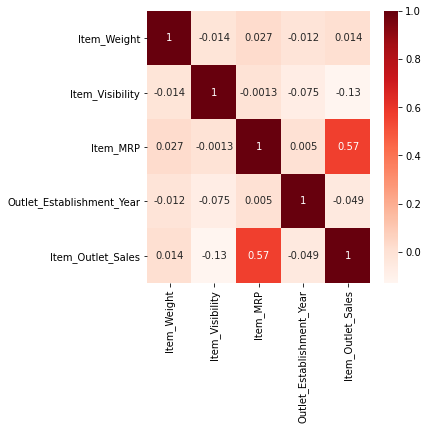

In [ ]:
#Observe and analyse Correlation amongst features and Target Variable

plt.figure(figsize=(5,5))
cor = cs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Correlation Matrix is visualized above, which indicates that none of the independent variables are highly correlated to each other(neither negatively nor positively).

Multicollinearity in the dataset is very less and can be neglected.

Also, it can be observed that:
"Item_Outlet_price"(Target Variable) is highly dependent on "Item_MRP"(Independent feature)

In [ ]:
#Visulaize the number of null values/ Missing values in the Training 

cs.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Visualize the number of null values in the Test dataset

x_test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are just 2 columns of missing values.

Item_Weight has Numeric Data ,which has around 17% data missing in both Training  and Test set.

Outlet_size has Categorical Data, which has around 29% data missing in both Training and test set.

In [ ]:
#Find the number of unique categories in Item_Fat_Content column

cs['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

There are duplicate names present for the same category.
We have to convert low fat to Low Fat, LF to Low Fat and reg to Regular

This helps to decrease the number of categories in that column so that low fat and LF are treated as Low Fat and reg is also treated as Regular.

It also helps in decreasing the number of features after we  encode the categorical data which basically performs feature reduction , thus reducing complexity of the model. 

In [ ]:
#Fixing Duplicate names in the column 'Item_Fat_content in Train data

cs['Item_Fat_Content'].replace('LF','Low Fat', inplace= True)
cs['Item_Fat_Content'].replace('low fat','Low Fat', inplace= True)
cs['Item_Fat_Content'].replace('reg','Regular', inplace= True)
#Fixing Duplicate names in the column 'Item_Fat_content in Test data

x_test['Item_Fat_Content'].replace('LF','Low Fat', inplace= True)
x_test['Item_Fat_Content'].replace('low fat','Low Fat', inplace= True)
x_test['Item_Fat_Content'].replace('reg','Regular', inplace= True)

In [ ]:
#Find the number of unique categories in Outlet_Identifier column
cs['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

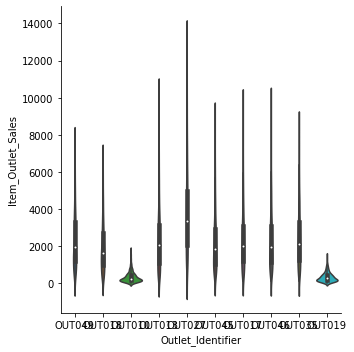

In [ ]:
#Visualize the effect of 'Outlet_Identifier' on target variable.

sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales",kind="violin", data=cs)

The Violin Plot shows that the target variable varies significantly with different categories of Outlet_identifier.

For example ,  the Sales remains very low for two categories (OUT010 and OUT019) and doesn't cross 2000 sales mark for both.
Outlet_sales varies a lot with other categories of this column as well which indicates that Outlet_Identifier is also an important feature for prediction although it has too many categories.

Text(0.5, 0, 'Item_MRP')

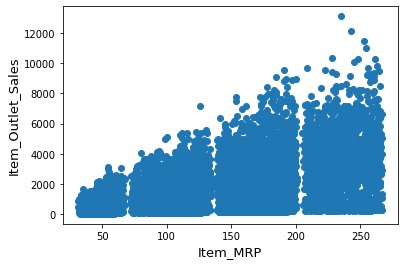

In [ ]:
#Visualizing and observing the outliers of the target variable

fig, ax = plt.subplots()
ax.scatter(x = cs['Item_MRP'], y = cs['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales', fontsize=13)
plt.xlabel('Item_MRP', fontsize=13)

Outliers are one of the major contributors to reducing model's performance , thus it is very important to eliminate outliers.

Even a few outliers may disrupt the whole model and change the fit of the model.

For multivariate Linear Regression we cannot visualize target variable with all the features simultaneously , so we consider the most significant feature for the job.  

The most significant numerical feature that we observed from Correlation matrix was Item_MRP

So, we investigate the outliers using this particular feature.
Observing outliers and eliminating them becomes very important when the target variable is not categorical (Ex. for sales , price etc.)

Which is why outlier dentification and elimination is very important aspect as far as regression problems are concerned.

In [ ]:
#Removing Outliers

cs= cs.drop(cs[(cs['Item_Outlet_Sales']>9000)].index)

All columns with sales amount more that 9000 has been removed , which removes 23 outliers from the dataset , which is too less to effect the quantity of the dataset.
The overall acuracy increased significantly after eliminating the outliers.


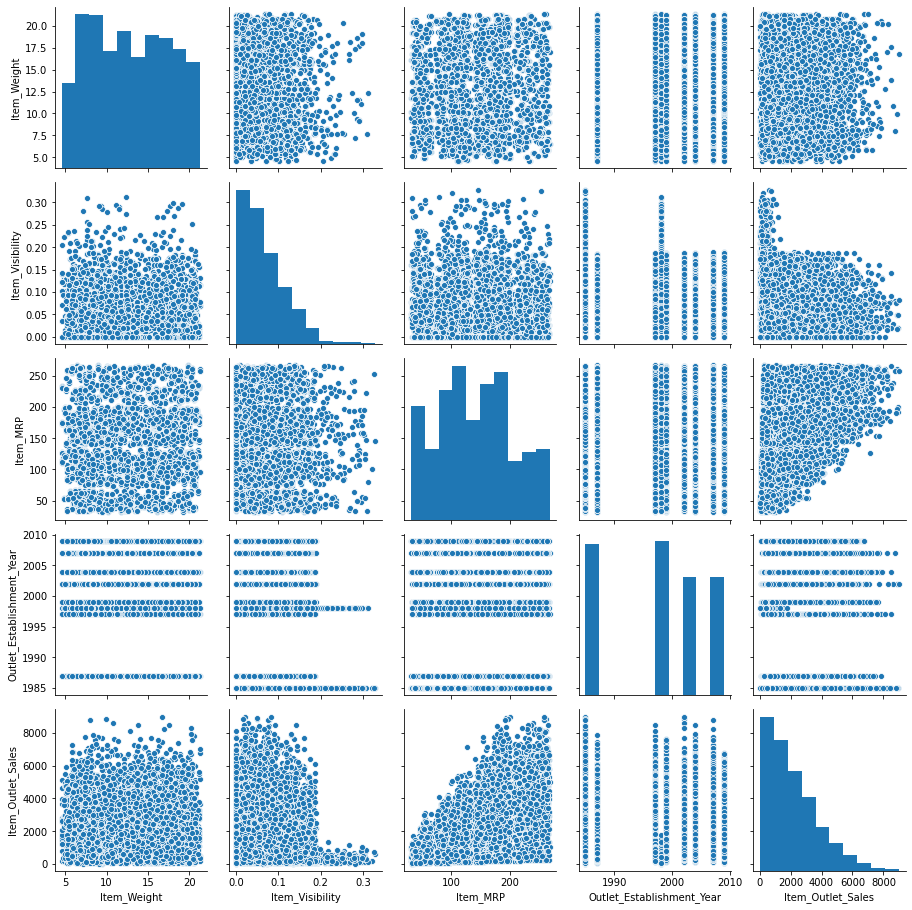

In [ ]:
#Visualizing pairplot between all variables.

print(sns.pairplot(cs))

One of the most important data analysis tool is pairplot which helps to visualize all relationships within the data at once.

In [ ]:
#Normalizing Numerical Data
#Because the ranges of features are very different
scaler = StandardScaler()
data=cs[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
scaler.fit(data)
data=scaler.transform(data)
cs[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=data

data=x_test[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
scaler.fit(data)
data=scaler.transform(data)
x_test[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=data


In [ ]:
#Defining Independent variables(x_train) and Target variable(y_train)
 
x_train=cs.iloc[:,:10]
y_train=cs.iloc[:,10]
y_train=pd.DataFrame(y_train)

From the pairplot, it can be observed that Item_Outlet_Sales , which is the target variable is not uniformly distributed(right skewed).

To confirm this, we plot the normal distribution of Item_Outlet_Sales in the next segment.


 mu = 2160.21 and sigma = 1658.98



Text(0.5, 1.0, 'Item_Outlet_Sales')

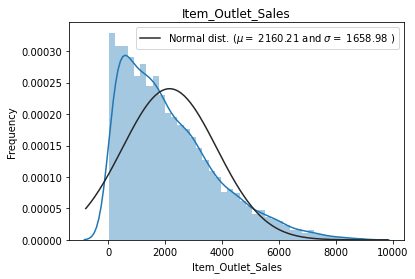

In [ ]:
#Plotting Normal Distribution.

sns.distplot(y_train['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train['Item_Outlet_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Item_Outlet_Sales')

#We also observe the mean and standard deviation for the same.
#In case of normal distribution, the mean, median & mode are approximately closer
#The skewness of the data can be determined by how these quantities are related to one another

There are some basic assumptions associated with a linear regression model expects :

1-Linearity: The relationship between X and the mean of Y is linear.

2-Homoscedasticity/Less Heteroscedasticity: The variance of residual is the same for any value of X.i.e. a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables

3-Normality: Y is as normally distributed as possible

Distribution confirms that the target variable is right skewed (Tail extends more on right side of distribution).




The model works well using this distribution but regression  model always does a better job  when it recieves normally distributed variables as target variables.This is because it linearizes relationships between input and output


Basically we are applying log(1+x) to all target variables x.

In [ ]:
scaler.fit(y_train)
y_train=scaler.transform(y_train)

scaler.fit(y_test)
y_test=scaler.transform(y_test)


 mu = 7.29 and sigma = 1.01



Text(0.5, 1.0, 'Item_Outlet_Sales')

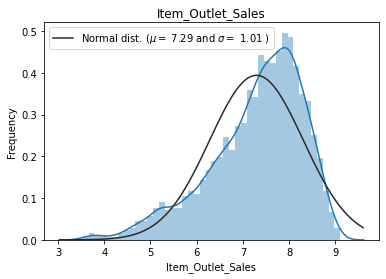

In [ ]:
#Applying LOG-TRANSFORMATION on Target Variable

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#y_train['Item_Outlet_Sales']  = np.log1p(y_train['Item_Outlet_Sales'] )

#Check the new distribution 
sns.distplot(y_train['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train['Item_Outlet_Sales'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Item_Outlet_Sales')

The Log Transformed Distribution looks far better distributed than the original one, standard deviation is also reduced to 1 and mean is around 7 , although for perfectly normal distribution standard deviation should be 1 and mean should be 0. 

Log Transformation of Target Variable has increased the accuracy significantly

In [ ]:
#To Observe the Target Variable after LOG-TRANSFORMATION

y_train['Item_Outlet_Sales']

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8500, dtype: float64

In [ ]:
#Creating A dummy Variable to perform operations using x_train and not affecting x_train.

xx_train=x_train

#To make sure that xx_train , x_train , y_train are in correct form

y_train=pd.DataFrame(y_train)
xx_train=pd.DataFrame(xx_train)
x_test=pd.DataFrame(x_test)

In [ ]:
#Encoding Each Categorical feature using ColumnTransfer and OneHotEncoder.

ct=ColumnTransformer([('encoder', OneHotEncoder(), ['Item_Fat_Content'])], remainder='passthrough')
xx_train = np.array(ct.fit_transform(xx_train), dtype = np.str)
x_test = np.array(ct.fit_transform(x_test), dtype = np.str)
ct=ColumnTransformer([('encoder', OneHotEncoder(), [4])], remainder='passthrough')
xx_train=np.array(ct.fit_transform(xx_train), dtype = np.str)
x_test=np.array(ct.fit_transform(x_test), dtype = np.str)
ct=ColumnTransformer([('encoder', OneHotEncoder(), [21])], remainder='passthrough')
xx_train=np.array(ct.fit_transform(xx_train), dtype = np.str)
x_test=np.array(ct.fit_transform(x_test), dtype = np.str)
ct=ColumnTransformer([('encoder', OneHotEncoder(), [34])], remainder='passthrough')
xx_train=np.array(ct.fit_transform(xx_train), dtype = np.str)
x_test=np.array(ct.fit_transform(x_test), dtype = np.str)
ct=ColumnTransformer([('encoder', OneHotEncoder(), [37])], remainder='passthrough')
xx_train=np.array(ct.fit_transform(xx_train), dtype = np.str)
x_test=np.array(ct.fit_transform(x_test), dtype = np.str)

In [ ]:
#Visualizing  x_train after encoding

xx_train=pd.DataFrame(xx_train)
xx_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.3,-0.9711032384780287,1.7559123490784536,0.1364382237905058,Medium
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.92,-0.9085001077176065,-1.4881420634488942,1.3327709060881028,Medium
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.5,-0.9572923261127609,0.014431056250088054,0.1364382237905058,Medium
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.2,-1.2820403206528472,0.6659622185794989,0.016804955560746102,nan
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.93,-1.2820403206528472,-1.3981281650379809,-1.2991609949666105,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.865,-0.18178917613591666,1.1879147025734547,-1.2991609949666105,High
8496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.38,-0.37169537312892553,-0.5241682525599622,0.49533802847978486,nan
8497,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.6,-0.600261095763102,-0.8949407829301244,0.7346045649393043,Small
8498,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.21,1.5317963450133745,-0.6050329968174541,1.3327709060881028,Medium


In [ ]:
# Converting xx_train and x_test into desirable format , as it takes the form of numpy array after encoding of columns.
 
xx_train=pd.DataFrame(xx_train)
x_test=pd.DataFrame(x_test)


In [ ]:
#Defining train data to fit into the model
x_train=xx_train.iloc[:,:40]
y_train=pd.DataFrame(y_train)

In [ ]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
#Replacing all Missing values as NaN so that they are easy to Identify.

x_train[35].replace('nan', np.nan, inplace= True)
x_test[35].replace('nan', np.nan, inplace= True)

In [ ]:
#Handling Missing Values of 'Item_Weight'column using Simple Imputer and using mean strategy to fill the missing values with mean of the column data 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x_train.iloc[:,35:37])
x_train.iloc[:,35:37] = imputer.transform(x_train.iloc[:,35:37])
imputer = imputer.fit(x_test.iloc[:,35:37])
x_test.iloc[:,35:37] = imputer.transform(x_test.iloc[:,35:37])

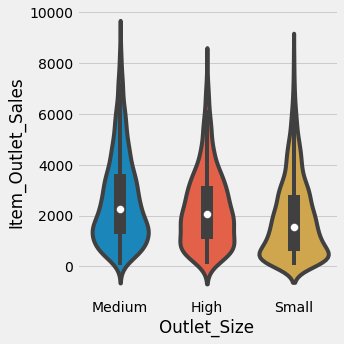

In [ ]:
#Visualizing the effect of Outlet_size on 'Item_Outlet_Sales'

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin", data=cs)

Each category individually doesn't have significant impact on the Target variable as the all the categories have similar range of Target variable.


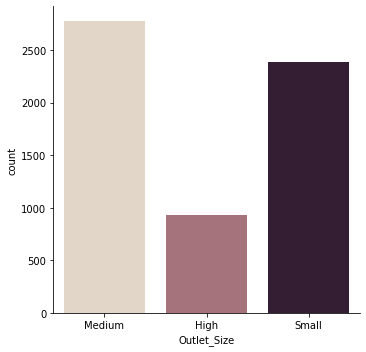

In [ ]:
#Visualizing the balance of categories within 'Item_Outlet_Sales' column. 
sns.catplot(x="Outlet_Size", kind="count", palette="ch:.25", data=cs)

The column has high imbalance in the categories , which can be seen from the above plot.Which is also an undesirable property

This is the column 'Outlet_size' column which contains 2410 missing values in Train set and 1606 missing values is Test set, i.e. around 4000 missing value in total.

This column has Categorical data which cannot be predicted using Linear Regression (which is the algorithm for this assignment)

Filling the missing values with any one of the category
(Ex: Medium or Small) will unbalance data in he column as there are many missing values in the column.

Also this column cannot increase the accuracy anyway so it is better to drop this column.

In [ ]:

x_train=x_train.drop([39],axis=1)
x_test=x_test.drop([39],axis=1)



# DATA SPLITTING

In [ ]:
X=x_train
Y=y_train

In [ ]:
#Splitting The Dataset Into Train and Validation set. 
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=73)

#COMPARING MODELS & REGULARIZATION TECHNIQUES

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWa

,R Square Score
Linear,0.714147
Ridge,0.714081
Hubber,0.711130
Lasso,-0.001089


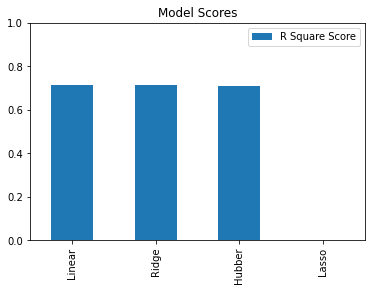

In [ ]:
#To Get the best Model among LinearRegression, RidgeRegression(L2),BayesianRidge, HuberRegressor and LassoRegression(L1)
#To apply and test all Regularizers possible and Evaluate each one's R2 score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def lets_try(X_train,Y_train):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X_train, Y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge(45)
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso()
    results["Lasso"]=test_model(clf)
  
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0,1])
    return results

lets_try(X_train,Y_train)

It is clear from the plot that Linear and Ridge Regression are best models amongst others. 

While Linear Regression performs marginally better , but this cannot be decided before we find optimum value for alpha in Ridge regression.

While LASSO does suprisingly bad after doing log Transformation.

#LINEAR REGRESSION MODEL

In [ ]:
#Fitting the LinearRegression Model with train data
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Prediction
Y_val_pred=reg.predict(X_val)

In [ ]:
#Evaluating the r2 score for LinearRegression
r2_score(Y_val,Y_val_pred)


0.723218961163838

R-squared, also known as the coefficient determination, defines the degree to which the variance in the target variable can be explained by the independent variables.


Say if  the R-squared value for a particular model comes out to be 0.74, it  indicates  that 74% of the variation in the target variable is explained by the independent variables

#RIDGE REGRESSION MODEL 


In [ ]:
#Applying Ridge Regularization Technique and estimating Optimum alpha value.

from statistics import mean 
from sklearn.model_selection import cross_val_score 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(0,100): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, Y_train) 
    scores = cross_val_score(ridgeModel, X, Y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.0 : 71.53970481633183
0.25 : 71.64799596264365
0.5 : 71.64813669956241
0.75 : 71.64827437239076
1.0 : 71.64840898977761
1.25 : 71.6485405602841
1.5 : 71.6486690923852
1.75 : 71.64879459447128
2.0 : 71.64891707484958
2.25 : 71.64903654174579
2.5 : 71.64915300330547
2.75 : 71.64926646759541
3.0 : 71.64937694260516
3.25 : 71.64948443624823
3.5 : 71.64958895636357
3.75 : 71.64969051071675
4.0 : 71.64978910700125
4.25 : 71.6498847528398
4.5 : 71.64997745578542
4.75 : 71.65006722332275
5.0 : 71.65015406286916
5.25 : 71.65023798177585
5.5 : 71.65031898732899
5.75 : 71.65039708675084
6.0 : 71.65047228720071
6.25 : 71.65054459577611
6.5 : 71.65061401951368
6.75 : 71.65068056539022
7.0 : 71.65074424032366
7.25 : 71.65080505117402
7.5 : 71.6508630047443
7.75 : 71.65091810778142
8.0 : 71.65097036697716
8.25 : 71.65101978896892
8.5 : 71.65106638034068
8.75 : 71.65111014762377
9.0 : 71.65115109729773
9.25 : 71.65118923579111
9.5 : 71.65122456948222
9.75 : 71.65125710469997
10.0 : 71.6512868477245


In [ ]:
#Evaluating Ridge Model with best aplha value
Best_model= Ridge(alpha = 12.5 ) 
Best_model.fit(X_train, Y_train) 
#Evaluating r2 score 
print(Best_model.score(X_val, Y_val)) 
Y_val_pred=Best_model.predict(X_val)
r2_score(Y_val,Y_val_pred)

0.7232494868360628


0.7232494868360628

#LASSO REGRESSION MODEL

In [ ]:
lassoModelChosen = Lasso(alpha = 4, tol = 0.0925) 
lassoModelChosen.fit(X_train, Y_train)  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_val, Y_val)) 

-1.385152996746797e-06


Ridge regression performs marginally better that Linear Regression.
Therefore we use Ridge Regression with the optimal parameter (alpha=12.5) as our best model.

#MODEL CHARACTERISTICS AND METRICS

In [ ]:
#Visualizing the Coeficients:
coef=pd.DataFrame(Best_model.coef_)
coef

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-0.081266,0.049886,0.03138,-0.960607,0.379687,0.101605,0.479315,-0.5707,0.02116,0.021068,0.101605,-0.389907,0.479315,0.057616,-0.028798,0.120033,0.188608,0.01403,0.038993,-0.003203,0.023836,-0.05259,-0.032906,0.008276,-0.021426,0.001939,-0.013731,0.024223,0.009843,0.032087,0.025756,-0.019011,-0.036116,-0.003281,0.003281,-0.000297,-0.00128,0.517683,0.025277


In [ ]:
 #Visualizing the Intercept:
Best_model.intercept_

array([7.05969565])

In [ ]:
 #Printing The Mean Absolute Error, Mean Squared Error, Root Mean Squared Error(RMSE).
 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_val, Y_val_pred))  
print('Mean Squared Error: ', metrics.mean_squared_error(Y_val,Y_val_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)))

Mean Absolute Error: 0.4095780732325803
Mean Squared Error:  0.2816480523053898
Root Mean Squared Error: 0.5307052405105774


The mean absolute error is around 0.41 which is less than 5% the mean of Target value.
This indicates that the model is very good at predicting Outlet sales.
Now that the model is performing very well , we move on to Test Prediction.


#TEST PREDICTION

In [ ]:
#Predicting 'Output_Sales' for Test values
Y_pred=Best_model.predict(x_test)

#Converting target values in actual form again to visualize the Prediction
Y_pred_test_actual=np.exp(Y_pred)-1
Y_pred_test_actual=pd.DataFrame(Y_pred_test_actual)
Y_pred_test_actual=Y_pred_test_actual.rename(columns={0:'Predicted_Output_Sales'})
Y_pred_test_actual

,Predicted_Output_Sales
0,1464.966277
1,1137.086765
2,604.113048
3,2157.022454
4,6230.022340
...,...
5676,1816.687768
5677,1855.688126
5678,1452.813194
5679,3563.315938


#VISUALISATION USING RESIDUAL PLOTS

In [ ]:
  Y_train=Y_train.astype(float)
  Y_val=Y_val.astype(float)
  Y_train.index = range(6800)
  Y_val.index = range(1700)
  y_train=pd.DataFrame(y_train)
  Y_val=pd.DataFrame(Y_val)

In [ ]:
# A function to plot the residual plot so that we dont have to write the code everytime.
def ResPlot(y_train_pred,y_pred,Y_train,Y_val):

  Y_val=pd.DataFrame(Y_val)
  y_pred=pd.DataFrame(y_pred)
  y_train_pred=pd.DataFrame(y_train_pred)
  y_train_pred=y_train_pred.rename(columns={0:'Item_Outlet_Sales'})
  y_pred=y_pred.rename(columns={0:'Item_Outlet_Sales'})

  plt.style.use('fivethirtyeight')

  ## plotting residual errors in training data 

  plt.scatter( y_train_pred,y_train_pred - Y_train ,color = "green", s=10, label = 'Train data') 
  ## plotting residual errors in test data 

  plt.scatter(y_pred, y_pred - Y_val, color = "blue", s = 10, label = 'Test data') 
    
  ## plotting the zero line residual error 
  plt.hlines(y = 0, xmin = 4, xmax = 10, linewidth = 2) 
    
  ## plotting legend 
  plt.legend(loc = 'upper right') 
    
  ## plot title 
  plt.title("RESIDUAL PLOT") 
    
  ## function to show plot 
  plt.show() 
    


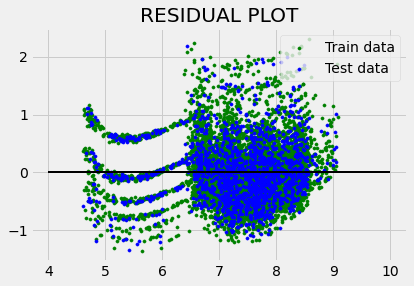

In [ ]:
#LINEAR REGRESSION MODEL:
y_train_pred=reg.predict(X_train)
y_pred=reg.predict(X_val)
ResPlot(y_train_pred,y_pred,Y_train,Y_val)


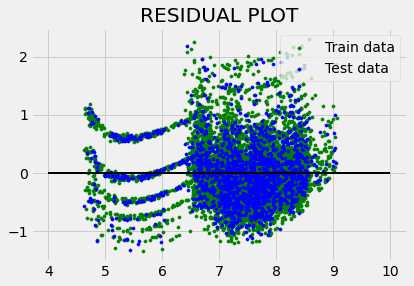

In [ ]:
#RIDGE REGRESSION MODEL(BEST MODEL):
y_train_pred=Best_model.predict(X_train)
y_pred=Best_model.predict(X_val)
ResPlot(y_train_pred,y_pred,Y_train,Y_val)

The residual plots indicates the effectiveness of the model.
Both the residual plot looks similar as there is probably not much difference in both the models.

Also both the model does extremely well in predicting the outlet sales.